# Introduction


**What?** SARIMA vs. SARIMAX



# SARIMA - motivation


- The problem with plain ARIMA model is it does not support seasonality.
- If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing. 



# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import pmdarima as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose

# Import dataset


- **a10** is a drug sales dataset.



In [2]:
data = pd.read_csv('../DATASETS/a10.csv', parse_dates=['date'], index_col='date')

In [3]:
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


# Normal vs. seasonal differencing


- The seasonal spikes are still there after applying usual differencing (lag 1). 
- Whereas, they are much more dampled after seasonal differencing.



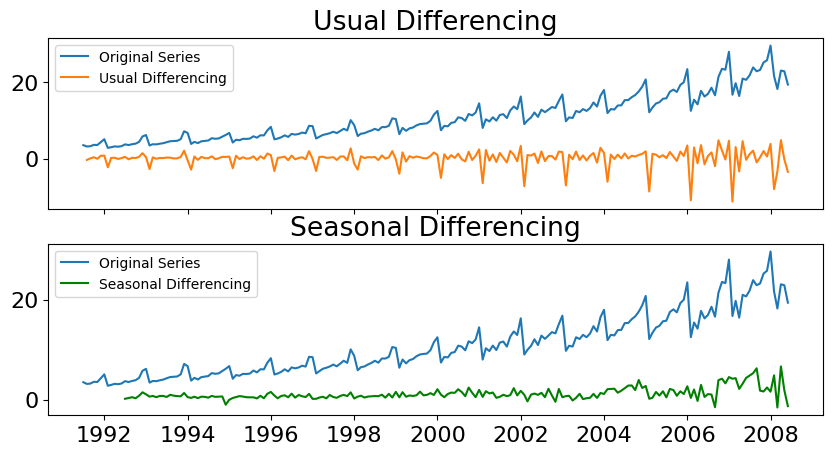

In [4]:
rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 16

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

axes[0].plot(data[:], label='Original Series')
# Usual differencing
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)



axes[1].plot(data[:], label='Original Series')
# Seasonal differencing
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# SARIMA modelling


- To do that, you need to set seasonal=True.
- Set the frequency m=12 for month wise series 
- Enforce D=1.  



In [5]:
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.67 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.67 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.677, Time=2.46 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.14 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.70 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.22 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

In [6]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.955
Date:                            Sat, 18 Sep 2021   AIC                            523.909
Time:                                    10:42:35   BIC                            549.969
Sample:                                         0   HQIC                           534.464
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0055      0.009      0.600      0.549      -0.012       0.023
ar.L1          0.9762      0.018     52.805      0.000       0.940       1.012
ma.L1         -0.9107      0.057    -16.079      0.000      -1.022      -0.800
ma.L2          0.2156      0.059      3.662      0.000       0.100       0.331
ar.S.L12       0.8397      0.154      5.470      0.000       0.539       1.141
ma.S.L12      -1.5828      0.174     -9.104      0.000      -1.924      -1.242
ma.S.L24       0.7677      0.110      6.983      0.000       0.552       0.983
sigma2         0.7477      0.066     11.327      0.000       0.618       0.877
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               141.65
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              14.39   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast


- Best model:  ARIMA(1,0,2)(1,1,2)
- Let’s forecast for the next 24 months. 



In [7]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


In [8]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

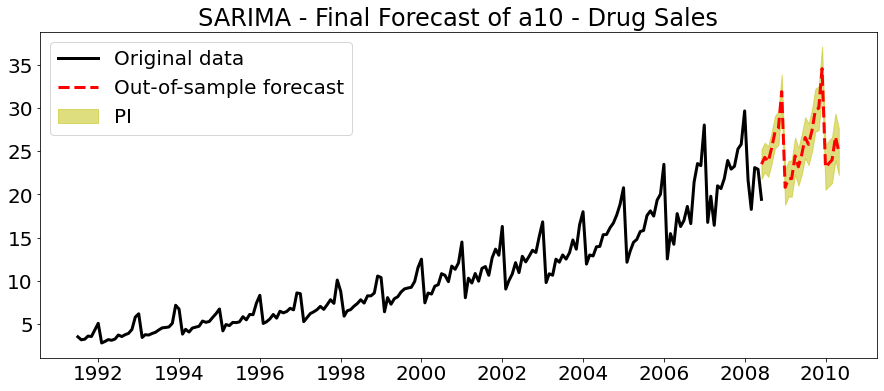

In [9]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20

plt.plot(data, "k-", lw = 3, label = "Original data")
plt.plot(fitted_series, "r--", lw = 3, label = "Out-of-sample forecast") 
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color = 'y', alpha=.5, label = "PI")

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.legend()
plt.show()

# SARIMAX Model with exogenous variable


- SARIMAX allows you to add an external predictor also called **exogenous**.
- We are going to use to use the seasonal index from the classical seasonal decomposition on the latest 36 months of data.
- Isn’t SARIMA already modeling the seasonality, you ask? Yes, but I want to see how the model looks if we force the recent seasonality pattern into the training and forecast.



In [10]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

In [11]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [12]:
# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [13]:
df

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,0.970490
1991-08-01,3.180891,8,1.050900
1991-09-01,3.252221,9,0.998881
1991-10-01,3.611003,10,1.059657
1991-11-01,3.565869,11,1.146141
...,...,...,...
2008-02-01,21.654285,2,0.803279
2008-03-01,18.264945,3,0.850667
2008-04-01,23.107677,4,0.832227


In [14]:
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.17 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=1.86 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=0.68 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.534, Time=2.64 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.18 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.01 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.22 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

In [15]:
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  204
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -258.394
Date:                              Sat, 18 Sep 2021   AIC                            530.788
Time:                                      10:43:06   BIC                            553.591
Sample:                                  07-01-1991   HQIC                           540.024
                                       - 06-01-2008                                         
Covariance Type:                                opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.1638      0.097      1.686      0.092      -0.027       0.354
seasonal_index  3.631e-07   3.17e+05   1.15e-12      1.000   -6.21e+05    6.21e+05
ar.L1              0.0960      0.043      2.226      0.026       0.011       0.181
ar.L2              0.4148      0.035     11.912      0.000       0.347       0.483
ar.L3              0.3510      0.054      6.546      0.000       0.246       0.456
ma.S.L12          -0.4627      0.058     -7.966      0.000      -0.577      -0.349
sigma2             0.8470      0.057     14.911      0.000       0.736       0.958
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               124.39
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              12.65   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.95e+14. Standard errors may be unstable.
"""


- The coefficient is very small for x1, so the contribution from that variable will be negligible. Let’s forecast it anyway.
- We have effectively forced the latest seasonal effect of the latest 3 years into the model instead of the entire history.
- Let’s forecast into the next 24 months.



In [16]:
df["seasonal_index"].values

array([0.97049014, 1.05089992, 0.99888107, 1.05965713, 1.14614116,
       1.15075029, 1.31691266, 0.80327935, 0.85066678, 0.83222688,
       0.95475059, 0.86534404, 0.97049014, 1.05089992, 0.99888107,
       1.05965713, 1.14614116, 1.15075029, 1.31691266, 0.80327935,
       0.85066678, 0.83222688, 0.95475059, 0.86534404, 0.97049014,
       1.05089992, 0.99888107, 1.05965713, 1.14614116, 1.15075029,
       1.31691266, 0.80327935, 0.85066678, 0.83222688, 0.95475059,
       0.86534404, 0.97049014, 1.05089992, 0.99888107, 1.05965713,
       1.14614116, 1.15075029, 1.31691266, 0.80327935, 0.85066678,
       0.83222688, 0.95475059, 0.86534404, 0.97049014, 1.05089992,
       0.99888107, 1.05965713, 1.14614116, 1.15075029, 1.31691266,
       0.80327935, 0.85066678, 0.83222688, 0.95475059, 0.86534404,
       0.97049014, 1.05089992, 0.99888107, 1.05965713, 1.14614116,
       1.15075029, 1.31691266, 0.80327935, 0.85066678, 0.83222688,
       0.95475059, 0.86534404, 0.97049014, 1.05089992, 0.99888

In [17]:
seasonal_index

,seasonal,month
date,,
2007-07-01,0.970490,7
2007-08-01,1.050900,8
2007-09-01,0.998881,9
2007-10-01,1.059657,10
2007-11-01,1.146141,11
2007-12-01,1.150750,12
2008-01-01,1.316913,1
2008-02-01,0.803279,2
2008-03-01,0.850667,3


In [33]:
print(n_periods)
print(seasonal_index.values.shape)
print((seasonal_index.values.reshape(-1,1).shape))
print(np.tile(seasonal_index.values, 2).reshape(-1,1).shape)

24
(12, 2)
(24, 1)
(48, 1)


In [34]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.values, 1).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


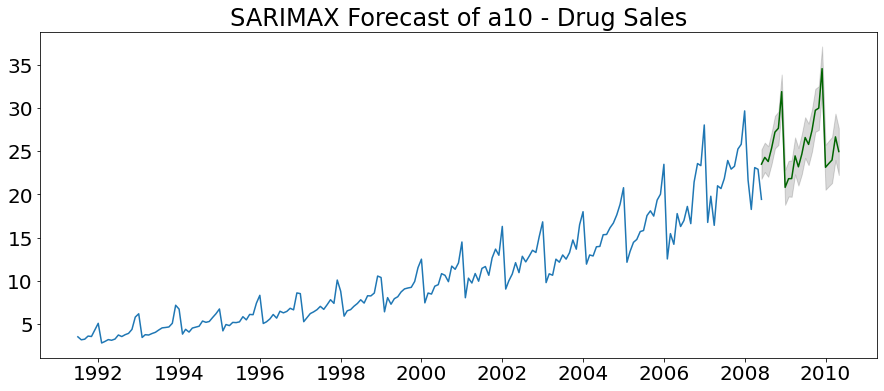

In [35]:
# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

# References


- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- [Download dataset](https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)
- https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

